#ML Foundation Project on Breast Cancer

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Preprocessing the data](#section3)<br>
  - 3.1 [Understanding the data](#section301)<br>
  - 3.2 [Imputation of missing data](#section302)<br>
4. [Exploratory Data Analysis](#section4)<br>
  - 4.1 [Correlation between class, age and menopause attributes](#section401)<br>
  - 4.2 [Correlation between class and tumor size attributes](#section402)<br>
  - 4.3 [Correlation between class and inv nodes attributes](#section403)<br>
  - 4.4 [Correlation between class, node caps, breast and degree of malignancy attributes](#section404)<br>
  - 4.5 [Correlation between class, breast quad and irradiate attributes](#section405)<br>
  - 4.6 [Summary of EDA](#section406)<br>
5. [Model Building](#section5)<br>
  - 5.1 [Split data for training and testing](#section501)<br>
  - 5.2 [Build a Logistic Regression model](#section502)<br>
  - 5.3 [Precision, Recall and F1 Score for Logistic Regression](#section503)<br>
  - 5.4 [Build a Random Forrest model](#section504)<br>
  - 5.5 [Precision, Recall and F1 Score for Random Forrest](#section505)<br>
  - 5.6 [Tune the Random Forrest model](#section506)<br>
  - 5.7 [Precision, Recall and F1 Score after tuning Random Forrest](#section507)<br>
  - 5.8 [Summary of Model Evaluation](#section508)<br>
6. [Conclusion](#section6)<br>

<a id=section1></a>
## 1. Problem Statement

We have to look into the **Breast Cancer** dataset, provided by the Oncology Institute which captures whether the events where **recurrent or not**. The objective shall be to **treat data gaps** and **missing values** first. Then we are expected to train **binary classification** models in order to **predict the recurring events**. We must use appropriate **evaluation metrics** to judge the **performance of our model**.

<a id=section2></a>
## 2. Data Loading and Description


- This is one of three domains provided by the **Oncology Institute** that has repeatedly appeared in the machine learning literature.

- This data set includes **201 instances** of **one class** and **85 instances** of **another class**. The instances are described by **9 attributes**, some of which are linear and some are nominal.

- There are **missing values present** in the data.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| class          | no-recurrence-events, recurrence-events      | 
| age            | 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99 |  
| menopause      | lt40, ge40, premeno     | 
| tumor_size	   | 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59  |   
| inv_nodes      | 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39|
| node_caps      | yes, no  |
| deg_malig      | 1, 2, 3 |
| breast         | left, right|
| breast_quad    | left-up, left-low, right-up, right-low, central |
| irradiat       | yes, no                                          |


__Importing Packages__

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

__Importing the Dataset__

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/realsayan/Simple-Datasets/master/breast-cancer.csv', index_col=0)
data.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
class,,,,,,,,,
no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Here we observe that the first **column class**, has been considered as the **index**. This must be **corrected** as it is an integral column in our data.

In [ ]:
data.reset_index(level=0, inplace=True)
print(data)
data_backup = data.copy()

                    class    age menopause  ... breast breast_quad irradiat
0    no-recurrence-events  30-39   premeno  ...   left    left_low       no
1    no-recurrence-events  40-49   premeno  ...  right    right_up       no
2    no-recurrence-events  40-49   premeno  ...   left    left_low       no
3    no-recurrence-events  60-69      ge40  ...  right     left_up       no
4    no-recurrence-events  40-49   premeno  ...  right   right_low       no
..                    ...    ...       ...  ...    ...         ...      ...
281     recurrence-events  30-39   premeno  ...   left     left_up       no
282     recurrence-events  30-39   premeno  ...   left     left_up      yes
283     recurrence-events  60-69      ge40  ...  right     left_up       no
284     recurrence-events  40-49      ge40  ...   left    left_low       no
285     recurrence-events  50-59      ge40  ...   left    left_low       no

[286 rows x 10 columns]


Accordingly, after using **reset_index()** method we get the **rectified dataframe** which has **class** as the **first column**.

<a id=section3></a>
## 3. Preprocessing the data

<a id=section301></a>
### 3.1 Understanding the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Apparently from **info()** method, there are **no missing values**. However, the dataset was mentioned to contain missing value. Hence we **must dig deeper** and look out for **invalid values**.

In [ ]:
#Get distinct values for each column to find invalid data, because it was mentioned there is missing data
for i in data.columns:
  print('Unique values in ',i,' column are : ',data[i].unique())


Unique values in  class  column are :  ['no-recurrence-events' 'recurrence-events']
Unique values in  age  column are :  ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
Unique values in  menopause  column are :  ['premeno' 'ge40' 'lt40']
Unique values in  tumor_size  column are :  ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Unique values in  inv_nodes  column are :  ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
Unique values in  node_caps  column are :  ['no' 'yes' '?']
Unique values in  deg_malig  column are :  [3 2 1]
Unique values in  breast  column are :  ['left' 'right']
Unique values in  breast_quad  column are :  ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
Unique values in  irradiat  column are :  ['no' 'yes']


We list out the sets of unique values for each column. 
- It is observed that for columns **node_caps** and **breast_quad** there are **invalid data** present in the form of **'?'**. These will need to be **imputed**.
- The **target variable** (column **class**) does not have any invalid value and the **two types** of value present are : **['no-recurrence-events' 'recurrence-events']**

In [ ]:
print('Frequency of unique values for column class :\n',data['class'].value_counts())
print('Frequency of unique values for column node_caps :\n',data['node_caps'].value_counts())
print('Frequency of unique values for column breast_quad :\n',data['breast_quad'].value_counts())

Frequency of unique values for column class :
 no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64
Frequency of unique values for column node_caps :
 no     222
yes     56
?        8
Name: node_caps, dtype: int64
Frequency of unique values for column breast_quad :
 left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast_quad, dtype: int64


- Frequency of the **major class** of the target variable : 201 i.e. **70.2797%**
- Frequency of the **minor class** of the target variable : 85 i.e. **29.7203%**
- For column **node_caps** there are **8 occurances** of invalid data **'?'**
- For column **breast_quad** there is **single occurance** of invalid data **'?'**

<a id=section302></a>
### 3.2 Imputation of missing data

Since columns **node_caps** and **breast_quad** are likely to be **dependent** on many of the **other features** we do not go for replacement using the mode value. Instead we plan to use the **KNN Imputer**, which uses **other features** to **determine these columns** wherever missing.
- As a **pre-requisite** to apply **KNN Imputer**, we need the dataset to comprise **only** of **numerical data**.
- Our approach shall be to use **One Hot Encoding** to achieve this. The justification being that the **categorical** features are **not ordinal**.

__Apply One Hot Encoding to the data__

In [ ]:
data_for_impute = pd.get_dummies(data, prefix=['class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'breast', 'breast_quad', 'irradiat'], drop_first=True)
data_for_impute.head()

,deg_malig,class_recurrence-events,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor_size_10-14,tumor_size_15-19,tumor_size_20-24,tumor_size_25-29,tumor_size_30-34,tumor_size_35-39,tumor_size_40-44,tumor_size_45-49,tumor_size_5-9,tumor_size_50-54,inv_nodes_12-14,inv_nodes_15-17,inv_nodes_24-26,inv_nodes_3-5,inv_nodes_6-8,inv_nodes_9-11,node_caps_no,node_caps_yes,breast_right,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_yes
0,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
4,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


After using the get_dummies() method, we get a One Hot Encoded dataset as desired. <br> However **before imputing** we need to **replace** the **'?'** values **with NaN** values.

In [ ]:
data_for_impute_copy = data_for_impute.copy() #create a copy of the encoded dataset
data_for_impute.loc[((data_for_impute['node_caps_no']==0) & (data_for_impute['node_caps_yes']==0)),['node_caps_no','node_caps_yes']]=np.NaN
# When value of both the columns 'node_caps_no' and 'node_caps_yes' are 0 at the same time, it means it was originally '?'
# Hence we set the value as NaN
print(data_for_impute.loc[((data_for_impute_copy['node_caps_no']==0) & (data_for_impute_copy['node_caps_yes']==0)),['node_caps_no','node_caps_yes']])

data_for_impute.loc[((data_for_impute['breast_quad_left_low']==0) & (data_for_impute['breast_quad_left_up']==0) & (data_for_impute['breast_quad_right_up']==0) & (data_for_impute['breast_quad_right_low']==0) & (data_for_impute['breast_quad_central']==0) ),['breast_quad_left_low','breast_quad_left_up','breast_quad_right_up','breast_quad_right_low','breast_quad_central']]=np.NaN
# Similarly when values for all the columns with prefix 'breast_quad_' are 0 at the same time, it means it was originally '?'
# Hence we set the value as NaN
print(data_for_impute.loc[((data_for_impute_copy['breast_quad_left_low']==0) & (data_for_impute_copy['breast_quad_left_up']==0) & (data_for_impute_copy['breast_quad_right_up']==0) & (data_for_impute_copy['breast_quad_right_low']==0) & (data_for_impute_copy['breast_quad_central']==0)),['breast_quad_left_low','breast_quad_left_up','breast_quad_right_up','breast_quad_right_low','breast_quad_central']])


     node_caps_no  node_caps_yes
145           NaN            NaN
163           NaN            NaN
164           NaN            NaN
183           NaN            NaN
184           NaN            NaN
233           NaN            NaN
263           NaN            NaN
264           NaN            NaN
     breast_quad_left_low  ...  breast_quad_central
206                   NaN  ...                  NaN

[1 rows x 5 columns]


__Apply KNN Imputer to replace missing values__

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
data_for_impute = pd.DataFrame(imputer.fit_transform(data_for_impute))

# Below 2 lines are required just for checking the original numbers of '?' values, so keeping them commented unless required
# print('Frequency of unique values for column node_caps : \n',data['node_caps'].value_counts())
# print('Frequency of unique values for column breast_quad : \n',data['breast_quad'].value_counts())

In [ ]:
# Check the outcome for columns with prefix 'node_caps_' after imputation for the eight rows that required rectification
# Columns in focus are from 25 to 26
print("\n\nOutcome for columns with prefix 'node_caps_' after imputation for row index (145) that required rectification")
print(data_for_impute.iloc[145,25:27])
print("\n\nOutcome for columns with prefix 'node_caps_' after imputation for row index (163,164) that required rectification")
print(data_for_impute.iloc[163:165,25:27])
print("\n\nOutcome for columns with prefix 'node_caps_' after imputation for row index (183,184) that required rectification")
print(data_for_impute.iloc[183:185,25:27])
print("\n\nOutcome for columns with prefix 'node_caps_' after imputation for row index (233) that required rectification")
print(data_for_impute.iloc[233,25:27])
print("\n\nOutcome for columns with prefix 'node_caps_' after imputation for row index (263,264) that required rectification")
print(data_for_impute.iloc[263:265,25:27])

# Check the outcome for columns with prefix 'breast_quad_' after imputation for the single row that required rectification
# Columns in focus are from 27 to 32
print("\n\nOutcome for columns with prefix 'breast_quad_' after imputation for row index (206) that required rectification")
data_for_impute.iloc[206,27:33]



Outcome for columns with prefix 'node_caps_' after imputation for row index (145) that required rectification
25    1.0
26    0.0
Name: 145, dtype: float64


Outcome for columns with prefix 'node_caps_' after imputation for row index (163,164) that required rectification
      25   26
163  1.0  0.0
164  1.0  0.0


Outcome for columns with prefix 'node_caps_' after imputation for row index (183,184) that required rectification
      25   26
183  0.5  0.5
184  1.0  0.0


Outcome for columns with prefix 'node_caps_' after imputation for row index (233) that required rectification
25    1.0
26    0.0
Name: 233, dtype: float64


Outcome for columns with prefix 'node_caps_' after imputation for row index (263,264) that required rectification
      25   26
263  1.0  0.0
264  1.0  0.0


Outcome for columns with prefix 'breast_quad_' after imputation for row index (206) that required rectification


27    0.0
28    0.0
29    0.5
30    0.0
31    0.0
32    0.5
Name: 206, dtype: float64

- **After imputation**, we observe that for columns related to **'node_caps_'**, 7 out of the 8 rows are imputed with 0 and 1 values as expected. For **row index (183)** the value **0.5 is assigned** to both columns. Since there is **no better way** for us to assign a value of 1 and 0 confidently, we **stick with this**. <br><br>
- For the columns related to **'breast_quad_'**, on observing the outcome we find **breast_quad_left_low=0.5** and **breast_quad_right_up=0.5**. We reject this, since we already have the information that for this case, the value of **breast_right is 0** (column index 27), meaning it is **confirmed** to be the **left breast**. So we can put **breast_quad_left_low=1** and **breast_quad_right_up=0**.

In [ ]:
data_for_impute.iloc[206,29] = 1 # Set breast_quad_left_low=1
data_for_impute.iloc[206,32] = 0 # Set breast_quad_right_up=0

# Check the outcome for columns with prefix 'breast_quad_' after replacing 0.5 by 1 and 0 for 'breast_quad_left_low' and 'breast_quad_right_up' respectively
# Columns in focus are from 27 to 32
print("\n\nOutcome for columns with prefix 'breast_quad_' after replacing 0.5 by 1 and 0 for 'breast_quad_left_low' and 'breast_quad_right_up' respectively")
data_for_impute.iloc[206,27:33]



Outcome for columns with prefix 'breast_quad_' after replacing 0.5 by 1 and 0 for 'breast_quad_left_low' and 'breast_quad_right_up' respectively


27    0.0
28    0.0
29    1.0
30    0.0
31    0.0
32    0.0
Name: 206, dtype: float64

After these validations, we are sure that **all missing values** have been **taken care of**.<br>
Next we move into **Exploratory Data Analysis (EDA)**.

<a id=section4></a>
## 4. Exploratory Data Analysis

__Using describe() method for analysis__

In [ ]:
data_for_impute.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2.048951,0.297203,0.125874,0.314685,0.335664,0.199301,0.020979,0.024476,0.524476,0.097902,0.104895,0.174825,0.188811,0.209790,0.066434,0.076923,0.010490,0.013986,0.027972,0.010490,0.020979,0.003497,0.125874,0.059441,0.034965,0.802448,0.197552,0.468531,0.073427,0.388112,0.339161,0.083916,0.115385,0.237762
std,0.738217,0.457828,0.332289,0.465204,0.473050,0.400175,0.143565,0.154791,0.500276,0.297703,0.306955,0.380483,0.392045,0.407872,0.249475,0.266936,0.102058,0.117638,0.165182,0.102058,0.143565,0.059131,0.332289,0.236862,0.184013,0.397749,0.397749,0.499883,0.261293,0.488174,0.474254,0.277748,0.320046,0.426459
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Because of all the **treatment** that has been done **during preprocessing**, the describe() method is of little significance. There is **no notable observation**.

<a id=section401></a>
### 4.1 Correlation between class, age and menopause attributes

In [ ]:
data_for_impute.iloc[:,1:9] # Selects class, age segment columns and menopause related columns

,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
281,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
282,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
283,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
284,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Correlation between features')

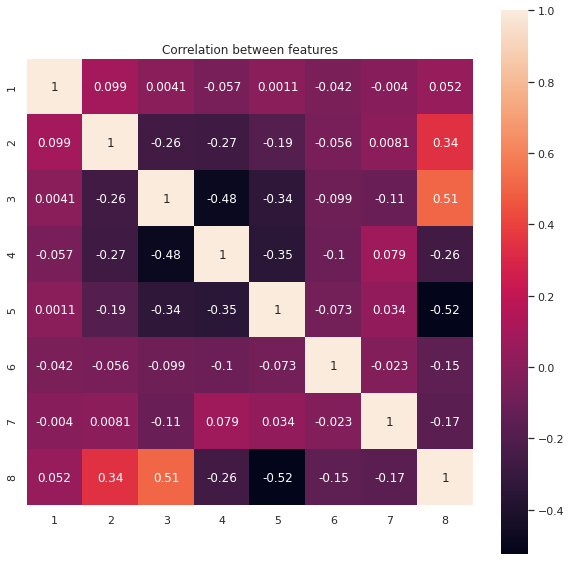

In [ ]:
corr = data_for_impute.iloc[:,1:9].corr() # Dataframe slice is fed into corr() method
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True) # Generates the heatmap corresponding to the correlation values from corr()
plt.title('Correlation between features')

- **Class** is **not significantly correlated** with either **age** or **menopause**.
- There is **moderate positive** correlation between **age** ranges of **30-49** and the patient being in a **premenopause phase**.

<a id=section402></a>
### 4.2 Correlation between class and tumor size attributes

In [ ]:
data_for_impute_class = data_for_impute.iloc[:,1] # Selects class columns
data_for_impute_tumor_size = data_for_impute.iloc[:,9:19] # Selects tumor size segment columns
data_for_impute_class_tumor_size = pd.concat([data_for_impute_class, data_for_impute_tumor_size], axis=1)
print(data_for_impute_class_tumor_size)

      1    9    10   11   12   13   14   15   16   17   18
0    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
281  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
282  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
283  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
284  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
285  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0

[286 rows x 11 columns]


Text(0.5, 1.0, 'Correlation between features')

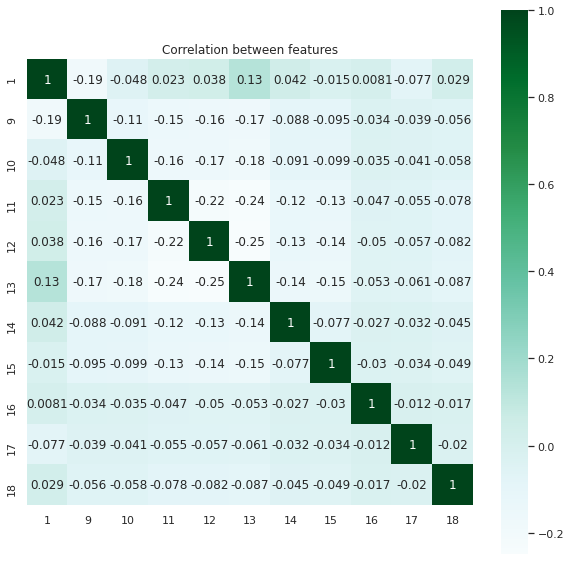

In [ ]:
corr = data_for_impute_class_tumor_size.corr() # Dataframe slice is fed into corr() method
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True, cmap='BuGn') # Generates the heatmap corresponding to the correlation values from corr()
plt.title('Correlation between features')

- Only for **tumor size** in range **10-14** there is **low negative correlation** with **class**.

<a id=section403></a>
### 4.3 Correlation between class and inv nodes attributes

In [ ]:
data_for_impute_class = data_for_impute.iloc[:,1] # Selects class columns
data_for_impute_inv_nodes = data_for_impute.iloc[:,19:25] # Selects inv nodes segment columns
data_for_impute_class_inv_nodes = pd.concat([data_for_impute_class, data_for_impute_inv_nodes], axis=1)
print(data_for_impute_class_inv_nodes)

      1    19   20   21   22   23   24
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...
281  1.0  0.0  0.0  0.0  0.0  0.0  0.0
282  1.0  0.0  0.0  0.0  0.0  0.0  0.0
283  1.0  0.0  0.0  0.0  0.0  0.0  0.0
284  1.0  0.0  0.0  0.0  1.0  0.0  0.0
285  1.0  0.0  0.0  0.0  1.0  0.0  0.0

[286 rows x 7 columns]


Text(0.5, 1.0, 'Correlation between features')

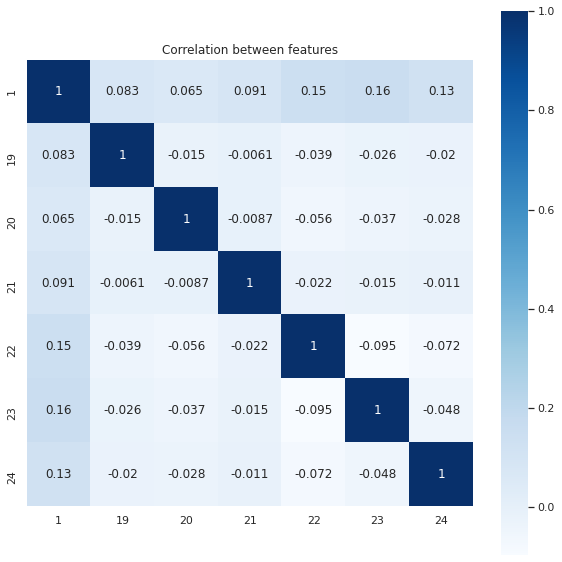

In [ ]:
corr = data_for_impute_class_inv_nodes.corr() # Dataframe slice is fed into corr() method
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True, cmap='Blues') # Generates the heatmap corresponding to the correlation values from corr()
plt.title('Correlation between features')

- Only for **inv nodes** in ranges **3-11** there is **very low positive correlation** with **class**.

<a id=section404></a>
### 4.4 Correlation between class, node caps, breast and degree of malignancy attributes

In [ ]:
data_for_impute_deg_class = data_for_impute.iloc[:,0:2] # Selects degree of malignency and class columns
data_for_impute_node_caps_breast = data_for_impute.iloc[:,25:28] # Selects node caps and breast columns
data_for_impute_deg_class_node_caps_breast = pd.concat([data_for_impute_deg_class, data_for_impute_node_caps_breast], axis=1)
print(data_for_impute_deg_class_node_caps_breast)

      0    1    25   26   27
0    3.0  0.0  1.0  0.0  0.0
1    2.0  0.0  1.0  0.0  1.0
2    2.0  0.0  1.0  0.0  0.0
3    2.0  0.0  1.0  0.0  1.0
4    2.0  0.0  1.0  0.0  1.0
..   ...  ...  ...  ...  ...
281  2.0  1.0  1.0  0.0  0.0
282  3.0  1.0  1.0  0.0  0.0
283  1.0  1.0  1.0  0.0  1.0
284  3.0  1.0  1.0  0.0  0.0
285  3.0  1.0  1.0  0.0  0.0

[286 rows x 5 columns]


Text(0.5, 1.0, 'Correlation between features')

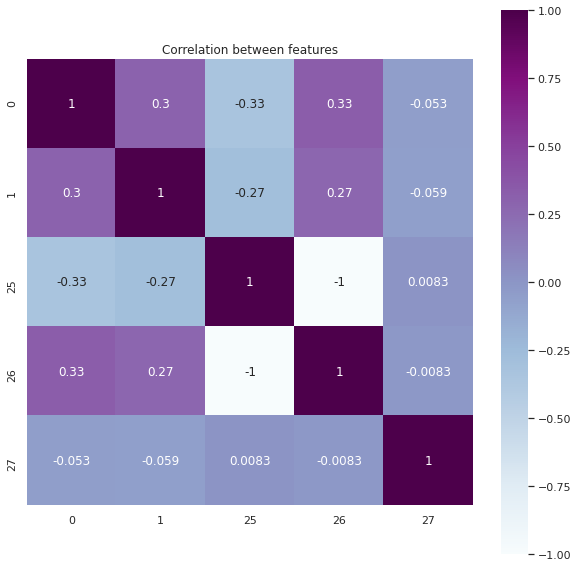

In [ ]:
corr = data_for_impute_deg_class_node_caps_breast.corr() # Dataframe slice is fed into corr() method
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True, cmap='BuPu') # Generates the heatmap corresponding to the correlation values from corr()
plt.title('Correlation between features')

- **Class** has moderate **positive correlation** with **degree of malignancy**.
- **Class** has low **positive correlation** with the presence of **node caps**.
- **Degree of malignancy** has moderate **positive correlation** with the presence of **node caps**.



<a id=section405></a>
### 4.5 Correlation between class, breast quad and irradiate attributes

In [ ]:
data_for_impute_class = data_for_impute.iloc[:,1] # Selects class column
data_for_impute_breast_quad_irradiat = data_for_impute.iloc[:,28:] # Selects breast quad and irradiate columns
data_for_impute_class_breast_quad_irradiat = pd.concat([data_for_impute_class, data_for_impute_breast_quad_irradiat], axis=1)
print(data_for_impute_class_breast_quad_irradiat)

      1    28   29   30   31   32   33
0    0.0  0.0  1.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  1.0  0.0
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  1.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...
281  1.0  0.0  0.0  1.0  0.0  0.0  0.0
282  1.0  0.0  0.0  1.0  0.0  0.0  1.0
283  1.0  0.0  0.0  1.0  0.0  0.0  0.0
284  1.0  0.0  1.0  0.0  0.0  0.0  0.0
285  1.0  0.0  1.0  0.0  0.0  0.0  0.0

[286 rows x 7 columns]


Text(0.5, 1.0, 'Correlation between features')

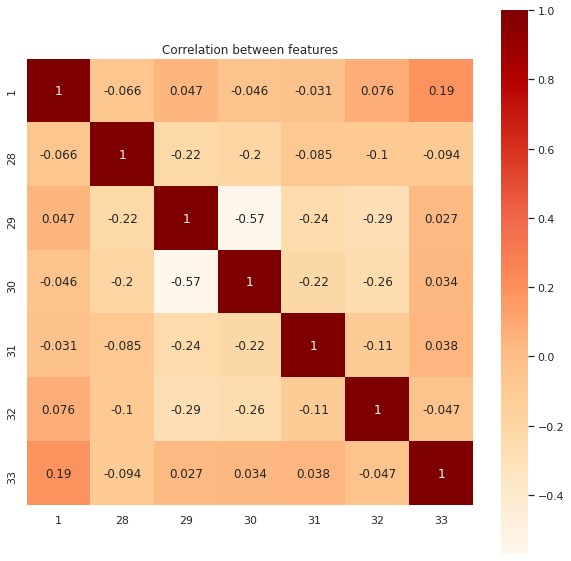

In [ ]:
corr = data_for_impute_class_breast_quad_irradiat.corr() # Dataframe slice is fed into corr() method
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True, cmap='OrRd') # Generates the heatmap corresponding to the correlation values from corr()
plt.title('Correlation between features')

- **Correlation** between **class** and **breast quads** is **insignificant**.
- **Irradiat** has **low positive** correlation with **class**.

<a id=section406></a>
### 4.6 Summary of EDA

1.   **Class** is **not significantly correlated** with **age**, **menopause** and **breast quads**.
2.   **Class** has low **positive correlation** with the presence of **node caps** and **irradiat** column.
3.   For **inv nodes**, the range **3-11** has **very low positive correlation** with **class**.
4.   **Class** has moderate **positive correlation** with **degree of malignancy**.
5.   For **tumor size** in range **10-14** there is **low negative correlation** with **class**.
6.   If the patient has **age** between **30-49** years then there is a **higher chance** of her being in a **premenopause phase**.
7.   **Greater** the **degree of malignancy**, higher are the chances of **node caps** being **present**.

<a id=section5></a>
## 5. Model Building

<a id=section501></a>
### 5.1 Split data for training and testing

In [ ]:
y = data_for_impute.iloc[:,1] # Creating the dataframe for the Target Variable (column class) which is the column index=1 of data_for_impute
print(y.shape)
data_for_impute.drop(axis=1, columns=1, inplace=True) # Dropping the column class, so that data_for_impute is effectively the dataframe of X variables
X = data_for_impute.iloc[:,:]
#data_for_impute_0 = data_for_impute.iloc[:,0]
#data_for_impute_2_33 = data_for_impute.iloc[:,2:]
#X = pd.concat([data_for_impute_0, data_for_impute_2_33], axis=1)
print(X.shape)


(286,)
(286, 33)


In [ ]:
# Split the complete data in to train and test using train_test_split() method
# test_size is taken as 20% of the complete data and random_state as 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# Check the shape (dimensions) of X_train, X_test, y_train, y_test
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (228, 33)
y_train shape:  (228,)

Test cases as below
X_test shape:  (58, 33)
y_test shape:  (58,)


The train test split has worked as expected and we can proceed with building of models.

<a id=section502></a>
### 5.2 Build a Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # Instantiate a model from LogisticRegression
logreg.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict the Target Variable for both Train and Test data using the model we have trained
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

__Note the accuracy score for the logistic regression model__

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for train data is: 0.7631578947368421
Accuracy score for test data is: 0.7241379310344828


By using **Logistic Regression** model, we obtain the **Accuracy Score** as:-<br>
- Train Data : 0.763
- Test Data : 0.724 <br>
It is fair to say that the model is **slightly overfitting**.

__Below we try GridSearchCV to find best C value__

In [ ]:
from sklearn.model_selection import GridSearchCV 

c_space = np.logspace(-2, 2, 20) # Create an array of values to be fed as the range of C values
param_grid = {'C': c_space}

logreg0 = LogisticRegression() # Instantiate a model from LogisticRegression
logreg_cv = GridSearchCV(logreg0, param_grid, cv = 8) # Instantiate Grid Search Cross Validation with cv = 8
  
logreg_cv.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

GridSearchCV(cv=8, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-02, 1.6...5090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01,

In [ ]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.18329807108324356}
Best score is 0.7373768472906403


After **tuning** the **Logistic Regression** model for **C values** we get:-<br>
- C : 0.183
- Best Score : 0.737 <br>
So we have **marginally improved** the **accuracy score** and this is also **more reliable** since we have used the **cross validation approach**.

<a id=section503></a>
### 5.3 Precision, Recall and F1 Score for Logistic Regression

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_train = precision_score(y_train,y_pred_train)
precision_test = precision_score(y_test,y_pred_test)
print('Precision score for train data:', precision_train)
print('Precision score for test data:', precision_test)

Precision score for train data: 0.6585365853658537
Precision score for test data: 0.6


In [ ]:
# Recall
from sklearn.metrics import recall_score
print('Recall score for train data:',recall_score(y_train,y_pred_train))   
print('Recall score for test data:',recall_score(y_test,y_pred_test))

Recall score for train data: 0.40298507462686567
Recall score for test data: 0.3333333333333333


In [ ]:
# F1 Score
from sklearn.metrics import f1_score
print('F1_score for train data:',f1_score(y_train,y_pred_train))
print('F1_score for test data:',f1_score(y_test,y_pred_test))

F1_score for train data: 0.5
F1_score for test data: 0.42857142857142855


For **Logistic Regression** we observe:-
> Precision Scores:-
*   Train : 0.659
*   Test : 0.600 

> Recall Scores:-
*   Train : 0.403
*   Test : 0.333

> F1 Scores:-
*   Train : 0.500
*   Test : 0.429



- The model is **slightly overfitting** with **train scores greater** than test.
- Since the **original dataset** has a approximate split of **70-30** for the **two classes**, it is better to **focus on precision** and **recall scores** rather than accuracy.
- Considering, predicting an **actual case of recurrence as non-recurring** (False Negative) is a bigger threat, **recall scores** are most vital.
- If we take a **balanced approach**, then we can **focus** on the **F1 scores** (the weighted average of precision and recall).
- Since the scores obtained are not impressive, we try another algorithm, Random Forrest next.

<a id=section504></a>
### 5.4 Build a Random Forrest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=8, max_features='log2' , max_depth=4, random_state=0) # Instantiate a model from RandomForestClassifier
rfc.fit(X_train,y_train) # Train (i.e. fit) the model with the training data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predict the Target Variable for both Train and Test data using the model we have trained
y_pred_train_rf = rfc.predict(X_train)
y_pred_test_rf = rfc.predict(X_test)

__Note the accuracy score for the random forrest model__

In [ ]:
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_rf))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_rf))

Accuracy score for train data is: 0.7807017543859649
Accuracy score for test data is: 0.7413793103448276


By using **Random Forrest** model, we obtain the **Accuracy Score** as:-<br>
- Train Data : 0.781
- Test Data : 0.741 <br>
It is fair to say that the model is **slightly overfitting**.<br>
We observe that the **accuracy score** obtained is a **little better than** what we obtained from **Logistic Regression**.

__Taking a look at the confusion matrix__

In [ ]:
c_matrix_train_rf = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf)) # Create a dataframe to capture the confusion matrix
c_matrix_train_rf.index = ['Actual no-recurrence-events','Actual recurrence-events']
c_matrix_train_rf.columns = ['Predicted no-recurrence-events','Predicted recurrence-events']
print("Confusion Matrix for Random Forrest for Train set\n",c_matrix_train_rf)

Confusion Matrix for Random Forrest for Train set
                              Predicted no-recurrence-events  Predicted recurrence-events
Actual no-recurrence-events                             157                            4
Actual recurrence-events                                 46                           21


This means 157 + 21 = __178 correct predictions__ & 46 + 4 = __50 false predictions__.

In [ ]:
c_matrix_test_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))
c_matrix_test_rf.index = ['Actual no-recurrence-events','Actual recurrence-events']
c_matrix_test_rf.columns = ['Predicted no-recurrence-events','Predicted recurrence-events']
print("Confusion Matrix for Random Forrest for test set\n",c_matrix_test_rf)

Confusion Matrix for Random Forrest for test set
                              Predicted no-recurrence-events  Predicted recurrence-events
Actual no-recurrence-events                              38                            2
Actual recurrence-events                                 13                            5


This means 38 + 5 = __43 correct predictions__ & 13 + 2 = __15 false predictions__.

<a id=section505></a>
### 5.5 Precision, Recall and F1 Score for Random Forrest

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_train = precision_score(y_train,y_pred_train_rf)
precision_test = precision_score(y_test,y_pred_test_rf)
print('Precision score for train data:', precision_train)
print('Precision score for test data:', precision_test)

Precision score for train data: 0.84
Precision score for test data: 0.7142857142857143


In [ ]:
# Recall
from sklearn.metrics import recall_score
print('Recall score for train data:',recall_score(y_train,y_pred_train_rf))   
print('Recall score for test data:',recall_score(y_test,y_pred_test_rf))

Recall score for train data: 0.31343283582089554
Recall score for test data: 0.2777777777777778


In [ ]:
# F1 Score
from sklearn.metrics import f1_score
print('F1_score for train data:',f1_score(y_train,y_pred_train_rf))
print('F1_score for test data:',f1_score(y_test,y_pred_test_rf))

F1_score for train data: 0.4565217391304348
F1_score for test data: 0.4


For **Random Forrest** we observe:-
> Precision Scores:-
*   Train : 0.840
*   Test : 0.714 

> Recall Scores:-
*   Train : 0.313
*   Test : 0.278

> F1 Scores:-
*   Train : 0.457
*   Test : 0.400


- The model is **overfitting** with **train scores greater** than test.
- From **magnitude** perspective **precision** scores of **Random Forrest** are much **better than Logistic Regression** but it is **highly overfitting** at the same time.
- **Recall scores** are poor for **Random Forrest** but **overfitting** is **negligible**.
- If we take a **balanced approach**, then we can **focus** on the **F1 scores**. This way, **Random Forrest** is **more robust** (train and test scores nearer) although **magnitude** of **Logistic Regression** was **higher**.


<a id=section506></a>
### 5.6 Tune the Random Forrest model

__Use hyper parameter for Random Forrest tuning using Random Search__

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,8),
              "min_samples_split": range(4, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [10, 60],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
# run randomized search
n_iter_search = 80
rfc_tuned = RandomizedSearchCV(rfc, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [ ]:
rfc_tuned.fit(X_train, y_train) # Train (i.e. fit) the model with the training data

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=4,
                                                    max_features='log2',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Predict the Target Variable for both Train and Test data using the model we have trained
y_pred_train_rf_tuned = rfc_tuned.predict(X_train)
y_pred_test_rf_tuned = rfc_tuned.predict(X_test)

__Accuracy Score after tuning random forrest__

In [ ]:
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_rf_tuned))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_rf_tuned))

Accuracy score for train data is: 0.8114035087719298
Accuracy score for test data is: 0.7758620689655172


By using **Tuned Random Forrest** model, we obtain the **Accuracy Score** as:-<br>
- Train Data : 0.811
- Test Data : 0.776 <br>
It is fair to say that the model is **slightly overfitting**.<br>
We observe that the **accuracy score** obtained is the **best** beating the scores we obtained from **Random Forrest** and **Logistic Regression**.

<a id=section507></a>
### 5.7 Precision, Recall and F1 Score after tuning Random Forrest

In [ ]:
# Precision
precision_train_tuned = precision_score(y_train,y_pred_train_rf_tuned)
precision_test_tuned = precision_score(y_test,y_pred_test_rf_tuned)
print('Precision score for train data:', precision_train_tuned)
print('Precision score for test data:', precision_test_tuned)

Precision score for train data: 0.9285714285714286
Precision score for test data: 0.8571428571428571


In [ ]:
# Recall
print('Recall score for train data:',recall_score(y_train,y_pred_train_rf_tuned))   
print('Recall score for test data:',recall_score(y_test,y_pred_test_rf_tuned))

Recall score for train data: 0.3880597014925373
Recall score for test data: 0.3333333333333333


In [ ]:
# F1 Score
print('F1_score for train data:',f1_score(y_train,y_pred_train_rf_tuned))
print('F1_score for test data:',f1_score(y_test,y_pred_test_rf_tuned))

F1_score for train data: 0.5473684210526316
F1_score for test data: 0.48


For **Tuned Random Forrest** we observe:-
> Precision Scores:-
*   Train : 0.929
*   Test : 0.857 

> Recall Scores:-
*   Train : 0.388
*   Test : 0.333

> F1 Scores:-
*   Train : 0.547
*   Test : 0.480


- The model is still **slightly overfitting**.
- The **precision scores** obtained are the **highest**.
- The **recall score** on **test** data is same as that for **Logistic Regression**. Overall **Tuned Random Forrest** should be the **first choice** since the difference between **test** and **train** score is **lower than** that in case of **Logistic Regression**.
- Going by **F1 scores**, again **Tuned Random Forrest** gives the **best result**.


<a id=section508></a>
### 5.8 Summary of Model Evaluation

- Based on **Accuracy Scores**, the algorithms in increasing order of performance are : **Logistic Regression < Random Forrest < Tuned Random Forrest**.
- Because we believe the **dataset** to be **imbalanced** we look into **Precision, Recall and F1 scores**.
- Since our take is that the **minority** class, **recurring events** is more vital to be anticipated and it is **costly** if we **miss to predict** such cases, we put more **weightage** on **recall scores**.
- Judging by **Precision scores**, **Tuned Random Forrest** is the best. Although by magnitude, **Random Forrest** is better than **Logistic Regression**, also keeping **robustness** in mind we put **Random Forrest** as the **worst**.
- Going by **Recall scores**, clearly **Random Forrest** is the **worst**. **Tuned Random Forrest** and **Logistic Regression** both have the **same test recall** but since the former has a **lower train recall** (more robust), we adjudge it to be the best.
- If we want to look at how **balanced** the model performances are, then judging by **F1 scores**, the algoritms in increasing order of scores are : **Random Forrest < Logistic Regression < Tuned Random Forrest**.
- So we conclude that going by the comparative study of evaluation metrics, **Tuned Random Forrest** performs the **best**.

<a id=section6></a>
## 6. Conclusion

- We have tried to build a **binary classifier** to **predict** if a patient will have a **recurrence event or not**.
- We have used the **Logistic Regression** as well as the **Random Forrest** (including a **tuned version**) algorithms to build the model.
- All the models are **slightly overfitting**, **tuning reduced it** but was not totally removed.
- Since the **base dataset** had a **split of 70-30** (imbalanced) between the two classes. Hence metrics like **Precision, Recall and F1** scores were **preferred**.
- From our perspective, **this problem** demands that **false predictions of non-recurrence** have to be **lower**, so we judge **Recall score** to be most significant. The **Tuned Random Forrest** model turned out to be the best.
- However, even the Recall **score** for this one was **not very impressive**.
- **Scope for improvement** :-


> 1. We may **reduce** the probability **threshold**, therein **predicting** the **positive class more often**. This would improve the Recall value.
> 2. We also should look for trying other classification algorithms like **K Nearest Neighbour, Naive Bayes Classifier, SVM, neural networks** and more, which might help us to achieve a better model.
> 3. We should try to **increase** the **train dataset** if that improves the **learning** of **pattern present** in the data. This would also help us be **more confident** of the **robustness of our model**.


